## Project Title: Jewelry Price Optimization with ML

##### Client: Gemineye
##### Domain: Retail – Luxury Goods & E-commerce
##### Objective: To develop a predictive pricing model for jewelry items based on product attributes and historical sales data using machine learning.

#### Introduction:
Gemineye is a premium jewelry brand specializing in customized and ready-to-sell products featuring diverse materials such as gold, silver, diamonds, and precious gems. With increasing competition in the luxury retail space, the company seeks to implement data-driven pricing mechanisms to optimize profitability without compromising on brand perception.

Jewelry pricing is traditionally determined through manual markup models or subjective expert judgment, which may not consistently reflect real-time market dynamics, customer preferences, or inventory pressure. This project aims to replace static pricing methods with a dynamic machine learning-based model capable of adjusting and recommending prices based on product features, market trends, and historical data.

##### Business Goals:
- Identify the key features that influence jewelry prices.
- Build a predictive model to estimate optimal pricing for new or existing products.
- Support data-driven decision-making for pricing, promotions, and inventory planning.
- Improve revenue and customer satisfaction by aligning prices with market expectations and perceived product value.

##### Stakeholders Expectations:
This project involves multiple stakeholders, each with distinct roles and expectations. 
- Head of Pricing Strategy: Seeks actionable price recommendations based on predictive modeling.
- Sales & Marketing Director: Expects insights on which features influence perceived value.
- Data Science Team	: Require a maintainable, trackable pipeline with performance benchmarks.
- Executive Leadership:	Interested in ROI through pricing accuracy and improved revenue margins.

##### Dataset Description:
* Order datetime -	Date product was ordered
* Order ID - Identifier for order
* Purchased product ID - Identifier for product ordered
* Quantity of SKU in the order - Amount of stock keeping unit ordered
* Category ID	- Jewelry category identifier
* Category alias -Jewelry category
* Brand ID - Brand identifier
* Price in USD	-Jewelry price
* User ID	- User identifier
* Product gender (for male/female) -Target gender for product
* Main Color - Main color of the jewelry piece
* Main metal - The main metal used for mounting of the piece
* Main gem - What gem type mounted on the jewelry piece

In [45]:
# Import all necessary libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#from sklearn.model_selection import train_test_split 
#from sklearn import metrics
from datetime import datetime
#from sklearn.metrics import r2_score
#from sklearn.metrics import confusion_matrix
#from sklearn.metrics import mean_absolute_error, mean_squared_error

In [3]:
import os
print(os.getcwd())

C:\Users\IfeomaAugustaAdigwe\Desktop\JewlryPriceOptimisation\notebooks


### The Jewelry Dataset

In [7]:
# import the dataset

data = pd.read_csv('../data/Jewelry_Dataset.csv', header=None)
data.head(3)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,2018-12-01 11:40:29 UTC,1924719191579951782,1842195256808833386,1,1.806829e+18,jewelry.earring,0.0,561.51,1.515916e+18,NaN,red,gold,diamond
1,2018-12-01 17:38:31 UTC,1924899396621697920,1806829193678291446,1,1.806829e+18,NaN,NaN,212.14,1.515916e+18,NaN,yellow,gold,NaN
2,2018-12-02 13:53:42 UTC,1925511016616034733,1842214461889315556,1,1.806829e+18,jewelry.pendant,1.0,54.66,1.515916e+18,f,white,gold,sapphire


In [19]:
# Since the dataset didnt load with the correct headername, define correct column names as a list
columns = [
    "Order datetime",
    "Order ID",
    "Purchased product ID",
    "Quantity of SKU",
    "Category ID",
    "Category alias",
    "Brand ID",
    "Price in USD",
    "User ID",
    "Product gender",
    "Main Color",
    "Main metal",
    "Main gem"
]

data.columns = columns
data.head(3)

,Order datetime,Order ID,Purchased product ID,Quantity of SKU,Category ID,Category alias,Brand ID,Price in USD,User ID,Product gender,Main Color,Main metal,Main gem
0,2018-12-01 11:40:29+00:00,1924719191579951782,1842195256808833386,1,1.806829e+18,jewelry.earring,0.0,561.51,1.515916e+18,NaN,red,gold,diamond
1,2018-12-01 17:38:31+00:00,1924899396621697920,1806829193678291446,1,1.806829e+18,NaN,NaN,212.14,1.515916e+18,NaN,yellow,gold,NaN
2,2018-12-02 13:53:42+00:00,1925511016616034733,1842214461889315556,1,1.806829e+18,jewelry.pendant,1.0,54.66,1.515916e+18,f,white,gold,sapphire


In [20]:
data.tail(2)

,Order datetime,Order ID,Purchased product ID,Quantity of SKU,Category ID,Category alias,Brand ID,Price in USD,User ID,Product gender,Main Color,Main metal,Main gem
95909,2021-12-01 09:55:35+00:00,2719020596963836492,1835566854106513435,1,1.806829e+18,jewelry.earring,0.0,83.42,1.515916e+18,NaN,white,gold,fianit
95910,2021-12-01 09:59:07+00:00,2719022379232658075,1956663846156370429,1,1.806829e+18,jewelry.pendant,1.0,97.12,1.515916e+18,NaN,red,gold,NaN


In [ ]:
# Drop first row which contains old header
data = df.drop(index=0).reset_index(drop=True)

### Data Ingestion

In [21]:
print(data.columns)

Index(['Order datetime', 'Order ID', 'Purchased product ID', 'Quantity of SKU',
       'Category ID', 'Category alias', 'Brand ID', 'Price in USD', 'User ID',
       'Product gender', 'Main Color', 'Main metal', 'Main gem'],
      dtype='object')


In [22]:
## Check the shape of the data

data.shape

(95911, 13)

In [23]:
data.describe()

,Order ID,Purchased product ID,Quantity of SKU,Category ID,Brand ID,Price in USD,User ID
count,9.591100e+04,9.591100e+04,95911.0,9.055900e+04,9.112600e+04,90559.000000,9.055900e+04
mean,2.485185e+18,1.815970e+18,1.0,1.805947e+18,8.890938e+16,362.215217,1.512644e+18
std,1.934825e+17,2.136803e+17,0.0,2.083942e+16,3.559633e+17,444.155706,2.374763e+16
min,1.924719e+18,1.313551e+18,1.0,1.313678e+18,0.000000e+00,0.990000,1.313554e+18
25%,2.379723e+18,1.515966e+18,1.0,1.806829e+18,0.000000e+00,145.620000,1.515916e+18
50%,2.524276e+18,1.956664e+18,1.0,1.806829e+18,1.000000e+00,258.770000,1.515916e+18
75%,2.644347e+18,1.956664e+18,1.0,1.806829e+18,1.000000e+00,431.370000,1.515916e+18
max,2.719022e+18,2.541962e+18,1.0,1.806829e+18,1.550613e+18,34448.600000,1.554297e+18


In [24]:
## Check the info of the data

data.info

<bound method DataFrame.info of                  Order datetime             Order ID  Purchased product ID  \
0     2018-12-01 11:40:29+00:00  1924719191579951782   1842195256808833386   
1     2018-12-01 17:38:31+00:00  1924899396621697920   1806829193678291446   
2     2018-12-02 13:53:42+00:00  1925511016616034733   1842214461889315556   
3     2018-12-02 17:44:02+00:00  1925626951238681511   1835566849434059453   
4     2018-12-02 21:30:19+00:00  1925740842841014667   1873936840742928865   
...                         ...                  ...                   ...   
95906 2021-12-01 09:47:37+00:00  2719016587653808559   1515966223597820877   
95907 2021-12-01 09:50:37+00:00  2719018098886705639   1956663830729720074   
95908 2021-12-01 09:52:06+00:00  2719018846999544322   1956663848219968336   
95909 2021-12-01 09:55:35+00:00  2719020596963836492   1835566854106513435   
95910 2021-12-01 09:59:07+00:00  2719022379232658075   1956663846156370429   

       Quantity of SKU   Catego

In [25]:
data.isnull()

,Order datetime,Order ID,Purchased product ID,Quantity of SKU,Category ID,Category alias,Brand ID,Price in USD,User ID,Product gender,Main Color,Main metal,Main gem
0,False,False,False,False,False,False,False,False,False,True,False,False,False
1,False,False,False,False,False,True,True,False,False,True,False,False,True
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95906,False,False,False,False,True,False,False,True,True,True,True,True,True
95907,False,False,False,False,False,True,False,False,False,True,False,False,True
95908,False,False,False,False,False,False,False,False,False,False,False,False,False
95909,False,False,False,False,False,False,False,False,False,True,False,False,False


In [26]:
# Show the missing values

data.isna().sum()

Order datetime              0
Order ID                    0
Purchased product ID        0
Quantity of SKU             0
Category ID              5352
Category alias           9933
Brand ID                 4785
Price in USD             5352
User ID                  5352
Product gender          48168
Main Color               7660
Main metal               5462
Main gem                34058
dtype: int64

In [32]:
data["Product gender"].unique()

array([nan, 'f', 'm'], dtype=object)

## Data Cleaning

#### Convert Data Types

In [29]:
# Convert data types
data['Order datetime'] = pd.to_datetime(data['Order datetime'])

In [33]:
# Convert numerical columns are in correct format - Price in USD
data['Price in USD'] = pd.to_numeric(data['Price in USD'], errors='coerce')

In [34]:
# Convert numerical columns are in correct format - Quantity of SKU in the order
data['Quantity of SKU'] = pd.to_numeric(data['Quantity of SKU'], errors='coerce')

#### Drop or Replace missing values

In [50]:
#Drop rows with missing target variable (Price in USD)
data = data.dropna(subset=['Price in USD'])
#data.head

In [54]:
# Fill missing values # Categorical values can be fill with 'Unknown'

data['Category alias'].fillna('Unknown', inplace=True)
data['Brand ID'].fillna('Unknown', inplace=True)
data['Main metal'].fillna('Unknown', inplace=True)
data['Main Color'].fillna('Unknown', inplace=True)
data['Product gender'].fillna('Unknown', inplace=True)
data['Main gem'].fillna('Unknown', inplace=True)
#data

In [55]:
# Drop Irrelevant columns - User ID & Category ID

data.drop(columns=['User ID'], inplace=True)
data.drop(columns=['Category ID'], inplace=True)

### Add a Month Column

In [37]:
# Create a Month Column

data['Month'] = data['Order datetime'].dt.month
data.head()

,Order datetime,Order ID,Purchased product ID,Quantity of SKU,Category ID,Category alias,Brand ID,Price in USD,User ID,Product gender,Main Color,Main metal,Main gem,Month
0,2018-12-01 11:40:29+00:00,1924719191579951782,1842195256808833386,1,1.806829e+18,jewelry.earring,0.0,561.51,1.515916e+18,NaN,red,gold,diamond,12
1,2018-12-01 17:38:31+00:00,1924899396621697920,1806829193678291446,1,1.806829e+18,NaN,NaN,212.14,1.515916e+18,NaN,yellow,gold,NaN,12
2,2018-12-02 13:53:42+00:00,1925511016616034733,1842214461889315556,1,1.806829e+18,jewelry.pendant,1.0,54.66,1.515916e+18,f,white,gold,sapphire,12
3,2018-12-02 17:44:02+00:00,1925626951238681511,1835566849434059453,1,1.806829e+18,jewelry.pendant,0.0,88.90,1.515916e+18,f,red,gold,diamond,12
4,2018-12-02 21:30:19+00:00,1925740842841014667,1873936840742928865,1,1.806829e+18,jewelry.necklace,0.0,417.67,1.515916e+18,NaN,red,gold,amethyst,12


In [38]:
# Replace the month numbers with month names

data['MonthName'] = data['Month'].map({1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June',
                                   7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'})

data.head()

,Order datetime,Order ID,Purchased product ID,Quantity of SKU,Category ID,Category alias,Brand ID,Price in USD,User ID,Product gender,Main Color,Main metal,Main gem,Month,MonthName
0,2018-12-01 11:40:29+00:00,1924719191579951782,1842195256808833386,1,1.806829e+18,jewelry.earring,0.0,561.51,1.515916e+18,NaN,red,gold,diamond,12,December
1,2018-12-01 17:38:31+00:00,1924899396621697920,1806829193678291446,1,1.806829e+18,NaN,NaN,212.14,1.515916e+18,NaN,yellow,gold,NaN,12,December
2,2018-12-02 13:53:42+00:00,1925511016616034733,1842214461889315556,1,1.806829e+18,jewelry.pendant,1.0,54.66,1.515916e+18,f,white,gold,sapphire,12,December
3,2018-12-02 17:44:02+00:00,1925626951238681511,1835566849434059453,1,1.806829e+18,jewelry.pendant,0.0,88.90,1.515916e+18,f,red,gold,diamond,12,December
4,2018-12-02 21:30:19+00:00,1925740842841014667,1873936840742928865,1,1.806829e+18,jewelry.necklace,0.0,417.67,1.515916e+18,NaN,red,gold,amethyst,12,December


<Axes: title={'center': 'Visualizing missing values'}>

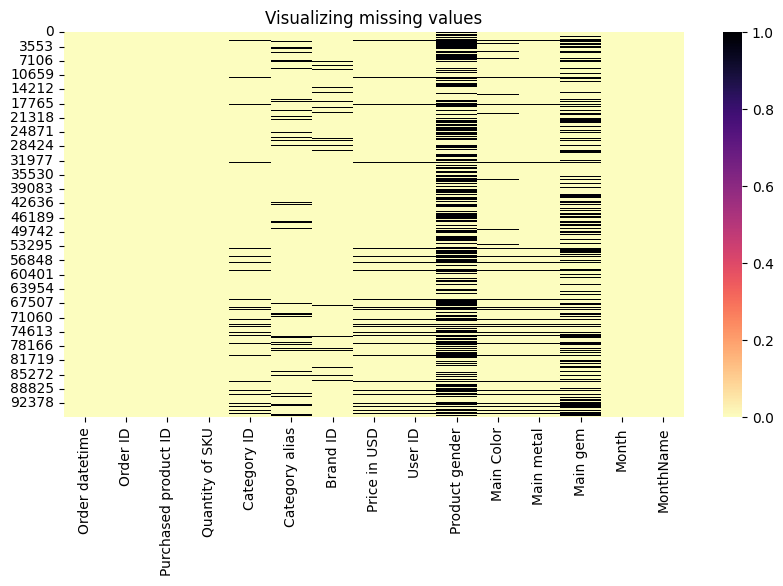

In [47]:
## Visualise missing value

plt.figure(figsize=(10, 5))
plt.title('Visualizing missing values')
sns.heatmap(data.isnull(), cbar=True, cmap='magma_r')
#plt.show() 

### Calculate the Total Sales

In [63]:
sales = round(data['Price in USD'].sum(), 2)
print(sales)


32801847.88


In [64]:
data.groupby('Product gender')['Price in USD'].sum(),2


(Product gender
 Unknown    14815684.83
 f          17833689.75
 m            152473.30
 Name: Price in USD, dtype: float64,
 2)